# COGS 108 - Final Project

### Data Cleaning/Pre-processing

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sp
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [36]:
improvedSani = pd.read_csv('ImprovedSanitation.csv')

#Drop the first 3 rows - consisting unrelated information to the data being used
improvedSani = improvedSani.drop(improvedSani.index[[0,1,2]])

#Set the value of the 1st row to be the column labels
improvedSani.columns = improvedSani.iloc[0]
#Drop the first row
improvedSani = improvedSani.drop(improvedSani.index[[0]])
del improvedSani.columns.name

#Remove rows that have missing data
improvedSani.dropna(inplace=True)

#Reset the index count and drop unnecessary columns
improvedSani.reset_index(level=0, inplace=True)
improvedSani= improvedSani.drop(columns=['index','Indicator Code','Indicator Name'])

improvedSani = improvedSani.rename(columns={2000.0: 2000, 2001.0:2001, 2002.0:2002, 2003.0:2003, 2004.0:2004,
                                                       2005.0:2005, 2006.0:2006, 2007.0:2007, 2008.0:2008, 2009.0:2009,
                                                       2010.0:2010, 2011.0:2011, 2012.0:2012, 2013.0:2013, 2014.0:2014,
                                                       2015.0:2015,})

#Rounding data values to 2 decimals
improvedSani[2000] = improvedSani[2000].apply(lambda x: round(x,2))
improvedSani[2001] = improvedSani[2001].apply(lambda x: round(x,2))
improvedSani[2002] = improvedSani[2002].apply(lambda x: round(x,2))
improvedSani[2003] = improvedSani[2003].apply(lambda x: round(x,2))
improvedSani[2004] = improvedSani[2004].apply(lambda x: round(x,2))
improvedSani[2005] = improvedSani[2005].apply(lambda x: round(x,2))
improvedSani[2006] = improvedSani[2006].apply(lambda x: round(x,2))
improvedSani[2007] = improvedSani[2007].apply(lambda x: round(x,2))
improvedSani[2008] = improvedSani[2008].apply(lambda x: round(x,2))
improvedSani[2009] = improvedSani[2009].apply(lambda x: round(x,2))
improvedSani[2010] = improvedSani[2010].apply(lambda x: round(x,2))
improvedSani[2011] = improvedSani[2011].apply(lambda x: round(x,2))
improvedSani[2012] = improvedSani[2012].apply(lambda x: round(x,2))
improvedSani[2013] = improvedSani[2013].apply(lambda x: round(x,2))
improvedSani[2014] = improvedSani[2014].apply(lambda x: round(x,2))
improvedSani[2015] = improvedSani[2015].apply(lambda x: round(x,2))

improvedSani

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Albania,ALB,54.67,55.49,56.35,57.18,58.00,58.79,59.56,60.31,61.04,61.74,62.42,63.08,63.71,64.31,64.80,64.82
1,Andorra,AND,6.46,15.31,24.17,33.02,41.87,50.72,59.57,68.43,77.28,86.13,94.98,100.00,100.00,100.00,100.00,100.00
2,Arab World,ARB,42.19,42.52,42.98,43.56,44.17,44.88,45.63,46.41,47.20,47.95,48.67,49.32,49.93,50.29,50.51,50.70
3,United Arab Emirates,ARE,92.61,92.67,92.73,92.79,92.84,92.90,92.95,93.01,93.06,93.11,93.16,93.20,93.25,93.29,93.33,93.37
4,Argentina,ARG,28.78,28.61,28.46,28.30,28.15,28.01,27.87,27.74,27.62,27.49,27.35,27.22,27.09,27.00,26.74,26.48
5,Australia,AUS,65.45,65.45,65.45,65.45,65.45,66.25,67.05,67.84,68.64,69.43,70.23,71.03,71.82,72.62,73.42,74.21
6,Austria,AUT,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78,96.78
7,Belgium,BEL,69.83,69.83,69.83,69.83,72.10,74.37,76.65,78.92,81.19,83.46,85.74,88.01,90.28,92.55,94.83,97.10
8,Bulgaria,BGR,71.82,72.11,72.43,72.75,73.06,71.34,69.31,67.23,65.11,62.94,60.72,58.45,56.14,53.78,51.33,48.86
9,Bosnia and Herzegovina,BIH,23.25,23.23,23.22,23.20,23.20,23.21,23.21,23.21,23.21,23.20,23.19,23.18,23.15,23.13,23.10,23.08


### Data Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

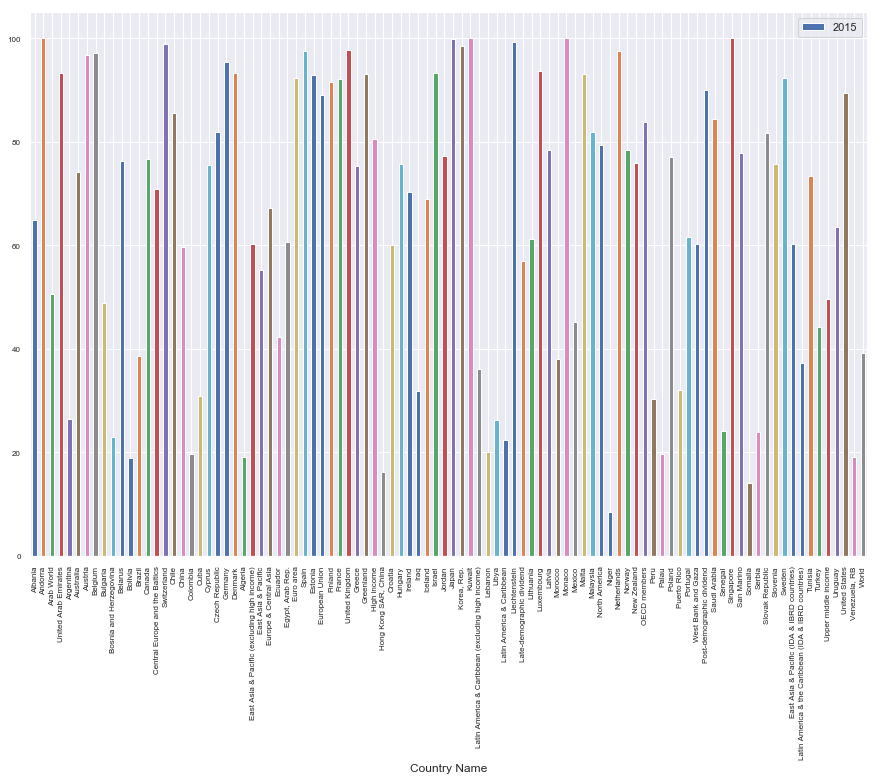

In [47]:
#Visualization of 2015 improved sanitation
improvedSani.plot.bar(x='Country Name', y=2015, rot=0, figsize=(15,10), fontsize=8)
plt.xticks(rotation='vertical')
